In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Make a data with outliers
salary = np.random.randint(10,210,100)

In [3]:
salary

array([162,  22, 128,  81,  28, 155,  53, 194,  29,  12,  73,  20, 193,
        15, 158,  53,  19,  12, 176,  29,  49, 102, 190,  41,  13,  83,
        75,  27, 193, 139, 188,  74, 107,  96,  52,  92,  34,  24,  75,
       151,  91, 155, 191, 116,  43,  92, 158, 111, 123,  21,  95, 104,
       102, 140, 202, 146, 110,  77,  20, 130, 156, 134, 171, 160,  57,
       108,  93, 177, 118,  82,  12, 181, 180, 150, 189, 196,  96, 179,
       188, 157, 183,  14, 123, 113,  88,  85,  51, 202,  49,  88, 143,
       116, 151, 136, 148,  28, 108,  45,  89, 201])

In [4]:
emp_id = np.linspace(1,100,100)

In [5]:
df_salary = pd.DataFrame({'ID':emp_id,'Salary':salary})

In [6]:
df_salary.head(5)

,ID,Salary
0,1.0,162
1,2.0,22
2,3.0,128
3,4.0,81
4,5.0,28


In [7]:
# Introducing Outliers in the Salary
random_indices = np.random.randint(1,100,5)

In [8]:
random_indices

array([60, 42, 79, 30,  8])

In [9]:
for i,x in enumerate(df_salary["Salary"]):
    for j in random_indices:
        if i==j:
            df_salary["Salary"][i] = x*2


            

C:\Users\bhosa\AppData\Local\Temp\ipykernel_8148\3567322283.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_salary["Salary"][i] = x*2
C:\Users\bhosa\AppData\Local\Temp\ipykernel_8148\3567322283.py:4: SettingWithCopyWarning: 
A value i

In [10]:
print(list(df_salary["Salary"]))

[162, 22, 128, 81, 28, 155, 53, 194, 58, 12, 73, 20, 193, 15, 158, 53, 19, 12, 176, 29, 49, 102, 190, 41, 13, 83, 75, 27, 193, 139, 376, 74, 107, 96, 52, 92, 34, 24, 75, 151, 91, 155, 382, 116, 43, 92, 158, 111, 123, 21, 95, 104, 102, 140, 202, 146, 110, 77, 20, 130, 312, 134, 171, 160, 57, 108, 93, 177, 118, 82, 12, 181, 180, 150, 189, 196, 96, 179, 188, 314, 183, 14, 123, 113, 88, 85, 51, 202, 49, 88, 143, 116, 151, 136, 148, 28, 108, 45, 89, 201]


# Plot a Scatter plot for this 

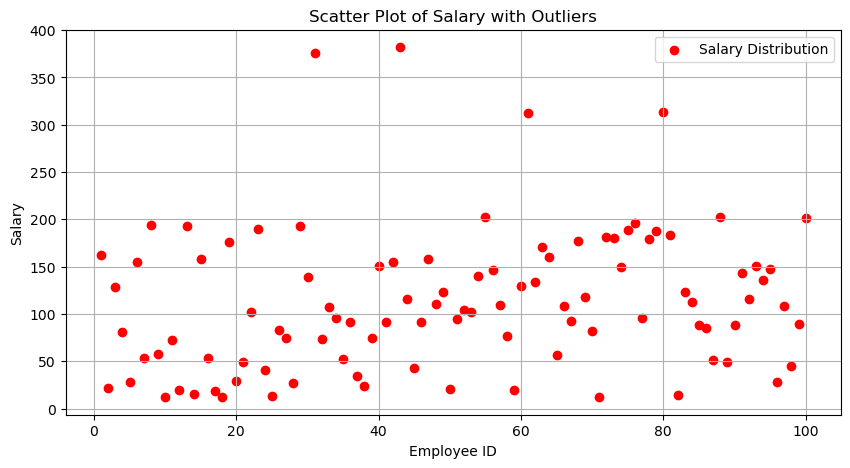

In [12]:
# Scatter Plot: ID vs Salary
plt.figure(figsize=(10, 5))
plt.scatter(df_salary["ID"], df_salary["Salary"], color="red", label="Salary Distribution")
plt.xlabel("Employee ID")
plt.ylabel("Salary")
plt.title("Scatter Plot of Salary with Outliers")
plt.legend()
plt.grid(True)
plt.show()

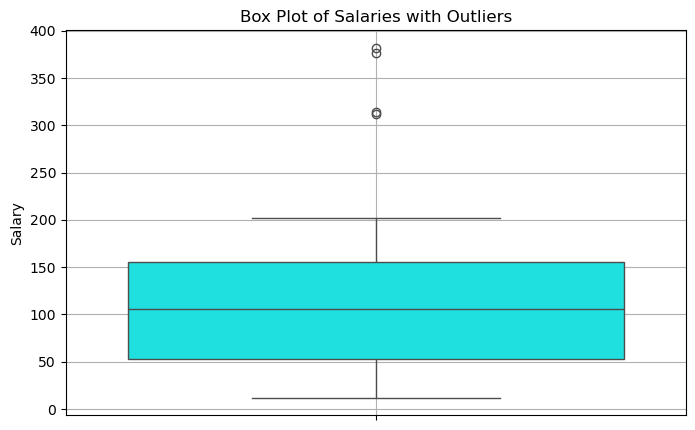

In [13]:
# Box Plot for Salary
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_salary["Salary"], color="cyan")
plt.ylabel("Salary")
plt.title("Box Plot of Salaries with Outliers")
plt.grid(True)
plt.show()

# Handling the Outliers

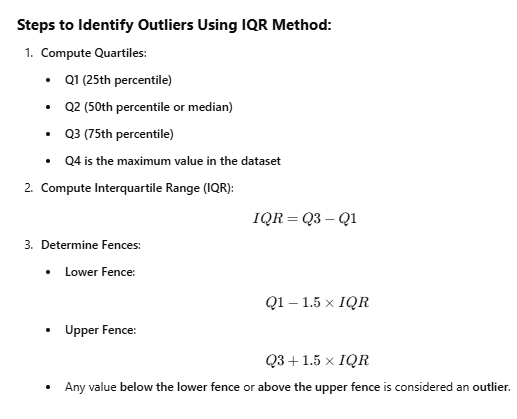

In [34]:
# Calculate Quartiles
Q1 = df_salary["Salary"].quantile(0.25)  # 25th percentile
Q2 = df_salary["Salary"].quantile(0.50)  # 50th percentile (Median)
Q3 = df_salary["Salary"].quantile(0.75)  # 75th percentile
Q4 = df_salary["Salary"].max()           # Maximum value

In [36]:
# Compute IQR
IQR = Q3 - Q1

In [38]:
# Compute Fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

In [40]:
outliers = []

for x in df_salary["Salary"]:
    if x < lower_fence or x > upper_fence:
        print("Outlier: ",x)
        outliers.append(x)

print(outliers)

Outlier:  376
Outlier:  382
Outlier:  312
Outlier:  314
[376, 382, 312, 314]


In [42]:
# Remove outliers from salary set
filtered_salary_set = salary_set - outliers_set


NameError: name 'salary_set' is not defined